# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [286]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st

from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = r"C:\Git\06-Python-APIs\Instructions\output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []
n = 0

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count

len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Define Lists to hold each specific value
temperature = []
humidity = []
latitude = []
longitude = []
cloudiness = []
wind_speed = []
dates = []
country_codes = []

set = 1

#Define URL and define unit type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
#query_url = f"{url}appid={api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
#Append City Data    
    try:
        latitude.append(response["coord"]["lat"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        longitude.append(response["coord"]["lon"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_codes.append(response["sys"]["country"])
        dates.append(response["dt"])
    except KeyError:
        print("City not found. Skipping...")
        latitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        longitude.append(np.nan)
        country_codes.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
        
    if n == 50:
        n = 0
        set += 1
    else:
        n += 1

#print(f"The weather API responded with: {weather_json}.")
        print(f"Processing record number {n} Set {set} | {[city]}")
#print("______________Data Processing Complete______________________")

Processing record number 1 Set 1 | ['mar del plata']
Processing record number 2 Set 1 | ['koslan']
Processing record number 3 Set 1 | ['katsuura']
Processing record number 4 Set 1 | ['itambacuri']
City not found. Skipping...
Processing record number 5 Set 1 | ['moiyabana']
Processing record number 6 Set 1 | ['ushuaia']
Processing record number 7 Set 1 | ['tateyama']
Processing record number 8 Set 1 | ['naples']
Processing record number 9 Set 1 | ['mataura']
Processing record number 10 Set 1 | ['albany']
City not found. Skipping...
Processing record number 11 Set 1 | ['satitoa']
Processing record number 12 Set 1 | ['baiyin']
Processing record number 13 Set 1 | ['nantong']
Processing record number 14 Set 1 | ['taltal']
Processing record number 15 Set 1 | ['thompson']
Processing record number 16 Set 1 | ['hithadhoo']
Processing record number 17 Set 1 | ['rio gallegos']
Processing record number 18 Set 1 | ['muravlenko']
Processing record number 19 Set 1 | ['upernavik']
Processing record nu

Processing record number 8 Set 4 | ['ngama']
Processing record number 9 Set 4 | ['mbanza-ngungu']
Processing record number 10 Set 4 | ['eloy']
Processing record number 11 Set 4 | ['khatanga']
Processing record number 12 Set 4 | ['ranong']
Processing record number 13 Set 4 | ['port hardy']
Processing record number 14 Set 4 | ['mahibadhoo']
Processing record number 15 Set 4 | ['tokur']
Processing record number 16 Set 4 | ['mendoza']
Processing record number 17 Set 4 | ['ossora']
Processing record number 18 Set 4 | ['hofn']
Processing record number 19 Set 4 | ['gat']
Processing record number 20 Set 4 | ['laguna']
Processing record number 21 Set 4 | ['olavarria']
Processing record number 22 Set 4 | ['san juan']
Processing record number 23 Set 4 | ['monte santo']
Processing record number 24 Set 4 | ['kodiak']
City not found. Skipping...
Processing record number 25 Set 4 | ['marcona']
City not found. Skipping...
Processing record number 26 Set 4 | ['sahrak']
Processing record number 27 Set 4

Processing record number 15 Set 7 | ['asau']
Processing record number 16 Set 7 | ['coahuayana']
Processing record number 17 Set 7 | ['novikovo']
Processing record number 18 Set 7 | ['karratha']
Processing record number 19 Set 7 | ['mutoko']
Processing record number 20 Set 7 | ['yukamenskoye']
Processing record number 21 Set 7 | ['adrar']
Processing record number 22 Set 7 | ['lingao']
Processing record number 23 Set 7 | ['tongliao']
Processing record number 24 Set 7 | ['rincon']
Processing record number 25 Set 7 | ['manokwari']
Processing record number 26 Set 7 | ['coquimbo']
Processing record number 27 Set 7 | ['sibu']
Processing record number 28 Set 7 | ['lieksa']
Processing record number 29 Set 7 | ['evans']
Processing record number 30 Set 7 | ['gotha']
Processing record number 31 Set 7 | ['lata']
Processing record number 32 Set 7 | ['upata']
Processing record number 33 Set 7 | ['touros']
City not found. Skipping...
Processing record number 34 Set 7 | ['vaitupu']
Processing record nu

Processing record number 27 Set 10 | ['hazorasp']
Processing record number 28 Set 10 | ['palmer']
Processing record number 29 Set 10 | ['chapais']
Processing record number 30 Set 10 | ['kazanskoye']
Processing record number 31 Set 10 | ['tooele']
Processing record number 32 Set 10 | ['barahona']
Processing record number 33 Set 10 | ['verkhoyansk']
Processing record number 34 Set 10 | ['bafoulabe']
Processing record number 35 Set 10 | ['prince rupert']
Processing record number 36 Set 10 | ['radhanpur']
Processing record number 37 Set 10 | ['bahia honda']
Processing record number 38 Set 10 | ['pisco']
Processing record number 39 Set 10 | ['hukuntsi']
Processing record number 40 Set 10 | ['plettenberg bay']
Processing record number 41 Set 10 | ['port lincoln']
Processing record number 42 Set 10 | ['mitu']
Processing record number 43 Set 10 | ['chabahar']
Processing record number 44 Set 10 | ['itoman']
Processing record number 45 Set 10 | ['balkanabat']
Processing record number 46 Set 10 |

In [13]:
#This is only testing and notes section
#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude
#len(temperature)
#len(humidity)
#len(latitude)
#len(longitude)
#len(cloudiness)
#len(wind_speed)
#len(dates)
#len(country_codes)
#len(cities)

619

In [135]:
#Convert raw data to Dataframe from previously created lists
cities_df = pd.DataFrame({"City": cities,
                           "Lat": latitude,
                           "Lng": longitude,
                            "Max Temp": temperature,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country_codes,
                           "Date": dates,
                          })

In [136]:
#Drop any NA values out of Dataframe and print new number of cities and show header of Dataframe
cities_df = cities_df.dropna(how='any')
print(f"Number of cities: {len(cities_df)}")
cities_df.head(10)

Number of cities: 573


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,64.42,50.0,0.0,4.00,AR,1.635199e+09
1,koslan,63.4564,48.8989,28.33,87.0,100.0,0.87,RU,1.635199e+09
2,katsuura,35.1333,140.3000,57.22,94.0,100.0,24.70,JP,1.635199e+09
3,itambacuri,-18.0311,-41.6850,70.84,95.0,97.0,3.76,BR,1.635199e+09
5,ushuaia,-54.8000,-68.3000,33.46,93.0,40.0,21.85,AR,1.635199e+09
6,tateyama,34.9833,139.8667,57.13,88.0,75.0,27.63,JP,1.635199e+09
7,naples,40.8333,14.2500,65.28,76.0,20.0,5.99,IT,1.635199e+09
8,mataura,-46.1927,168.8643,62.76,70.0,89.0,1.99,NZ,1.635199e+09
9,albany,42.6001,-73.9662,55.94,90.0,100.0,3.27,US,1.635199e+09
11,baiyin,36.5583,104.2081,40.08,71.0,99.0,2.04,CN,1.635199e+09


In [137]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,22.191298,16.111638,58.735550,73.356021,57.589878,7.803246,1.635199e+09
std,32.908407,90.361352,21.876859,20.075703,39.280162,5.644315,9.359017e+01
min,-54.800000,-179.166700,-23.420000,5.000000,0.000000,0.000000,1.635199e+09
25%,-2.683300,-64.616700,42.940000,66.000000,18.000000,3.830000,1.635199e+09
50%,27.688100,19.916700,63.210000,77.000000,73.000000,6.730000,1.635199e+09
75%,49.600000,96.128500,76.680000,87.000000,97.000000,10.560000,1.635199e+09
max,78.218600,179.316700,98.130000,100.000000,100.000000,35.680000,1.635199e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#For Dataframe info please reffer to Output above

In [138]:
#Export cities_df Dataframe into csv file that will be located in output_data folder
cities_df.to_csv(r'C:\Git\python-api-challenge\output_data\cities_2.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [140]:
#  Get the indices of cities that have humidity over 100%.
humidity_above_100 = cities_df.loc[cities_df["Humidity"] > 100]
print("Cities with humidity above 100%")
humidity_above_100

Cities with humidity above 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [124]:
humidity_above_100.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

#It appears that there are no cities with humidity above 100%

#Lets check number of items below or equal to 100%

In [141]:
humidity_within_100 = cities_df.loc[cities_df["Humidity"] <= 100]
print("Cities with humidity below or equal to 100%")
humidity_within_100

Cities with humidity below or equal to 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,64.42,50.0,0.0,4.00,AR,1.635199e+09
1,koslan,63.4564,48.8989,28.33,87.0,100.0,0.87,RU,1.635199e+09
2,katsuura,35.1333,140.3000,57.22,94.0,100.0,24.70,JP,1.635199e+09
3,itambacuri,-18.0311,-41.6850,70.84,95.0,97.0,3.76,BR,1.635199e+09
5,ushuaia,-54.8000,-68.3000,33.46,93.0,40.0,21.85,AR,1.635199e+09
...,...,...,...,...,...,...,...,...,...
614,alekseyevka,50.6309,38.6903,31.75,62.0,8.0,3.18,RU,1.635199e+09
615,loukhi,66.0764,33.0381,30.85,97.0,100.0,8.34,RU,1.635199e+09
616,candido mendes,-1.4467,-45.7167,80.17,77.0,34.0,6.62,BR,1.635199e+09
617,kota bahru,6.1333,102.2386,75.16,93.0,80.0,4.38,MY,1.635199e+09


In [142]:
#Obviously we don't have cities that are above 100%
humidity_within_100.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [85]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [86]:
#Renaming cities_df to clean_city_df even though we don't have cities that exceed humidity above 100!


In [143]:
clean_city_data = cities_df


In [144]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,64.42,50.0,0.0,4.00,AR,1.635199e+09
1,koslan,63.4564,48.8989,28.33,87.0,100.0,0.87,RU,1.635199e+09
2,katsuura,35.1333,140.3000,57.22,94.0,100.0,24.70,JP,1.635199e+09
3,itambacuri,-18.0311,-41.6850,70.84,95.0,97.0,3.76,BR,1.635199e+09
5,ushuaia,-54.8000,-68.3000,33.46,93.0,40.0,21.85,AR,1.635199e+09


In [145]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,22.191298,16.111638,58.735550,73.356021,57.589878,7.803246,1.635199e+09
std,32.908407,90.361352,21.876859,20.075703,39.280162,5.644315,9.359017e+01
min,-54.800000,-179.166700,-23.420000,5.000000,0.000000,0.000000,1.635199e+09
25%,-2.683300,-64.616700,42.940000,66.000000,18.000000,3.830000,1.635199e+09
50%,27.688100,19.916700,63.210000,77.000000,73.000000,6.730000,1.635199e+09
75%,49.600000,96.128500,76.680000,87.000000,97.000000,10.560000,1.635199e+09
max,78.218600,179.316700,98.130000,100.000000,100.000000,35.680000,1.635199e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

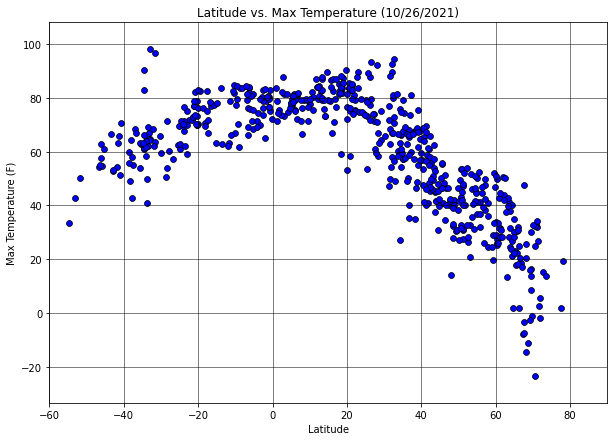

In [312]:
# Scatter 
lat = clean_city_data.iloc[:,1]
temp_max = clean_city_data.iloc[:,3]

plt.figure(figsize=(10,7))
plt.scatter(lat, temp_max,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
plt.xlim(-60,90)
plt.ylim(min(clean_city_data['Max Temp']) - 10, max(clean_city_data['Max Temp']) + 10)
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.title(f"Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(r"C:\Git\python-api-challenge\output_data\Lat_MaxTemp_Fig1.pdf")

*Looking at Latitude versus temperature plot above we can see obvious drop in temperature as it moves away from equator
*Bigger drop in temperature is visible on Northern Hemisphere, basically on positive latitude temperature drop is more
*significant
*Additionally, it is important to note that our data sample contains more samples from Norther. Hemisphere due to the way
*data is collected

## Latitude vs. Humidity Plot

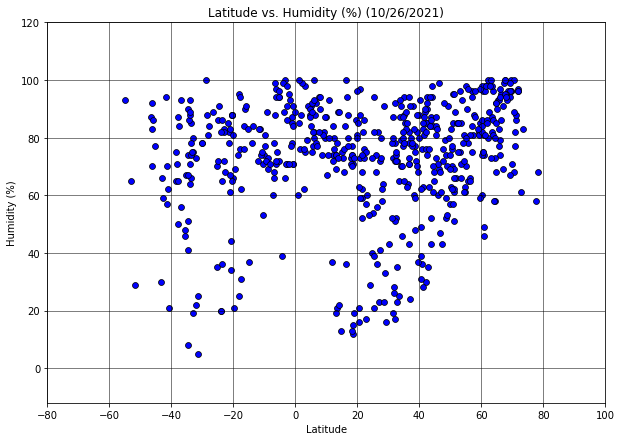

In [313]:
#Scatter plot Latitude vd. Humidity worldwide sample
lat = clean_city_data.iloc[:,1]
humidity = clean_city_data.iloc[:,4]
plt.figure(figsize=(10,7))

# Plot the lat vs humidity
plt.scatter(x = lat, y = humidity,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
plt.xlim(-80,100)
plt.ylim(min(clean_city_data['Humidity']) - 17, max(clean_city_data['Humidity']) + 20)
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.title(f"Latitude vs. Humidity (%) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig(r"C:\Git\python-api-challenge\output_data\Lat_Humidity_Fig2.pdf")

*Looking at Latitude versus Humidity plot above we can see that clodiness is fairly evenly distributed.
*Northern Hemisphere has more data collections, and it appears more dense ad slightly higher Humidity as we go
*further north
*Please note, our latitude distribution is from approximately -60 to +80, so there is more data on positive side

## Latitude vs. Cloudiness Plot

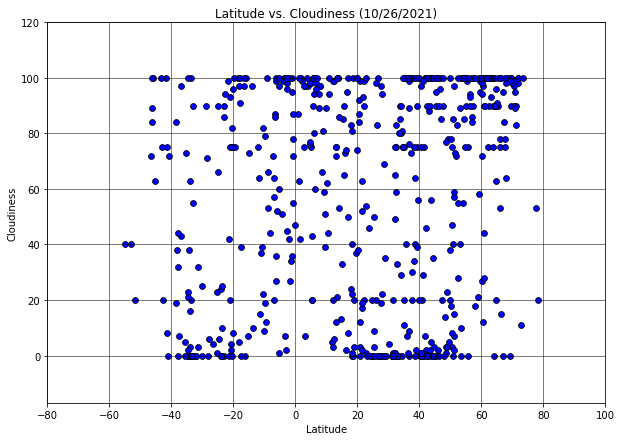

In [314]:
lat = clean_city_data.iloc[:,1]
cloudiness = clean_city_data.iloc[:,5]
plt.figure(figsize=(10,7))

# Plot the lat vs the cloudiness
plt.scatter(x = lat, y = cloudiness,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
plt.xlim(-80,100)
plt.ylim(min(clean_city_data['Cloudiness']) - 17, max(clean_city_data['Cloudiness']) + 20)
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.title(f"Latitude vs. Cloudiness ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show
plt.savefig(r"C:\Git\python-api-challenge\output_data\Lat_Cloudiness_Fig3.pdf")

*Looking at Latitude versus Cloudiness plot above we can see that Cloudiness is fairly evenly distributed, increasing as we 
*latitude increases northwards
*Northern Hemisphere has more data collections, and it appears more dense and slightly higher Cloudiness as we go
*further north
*Please note, our latitude distribution is from approximately -60 to +80, so there is more data on positive side

## Latitude vs. Wind Speed Plot

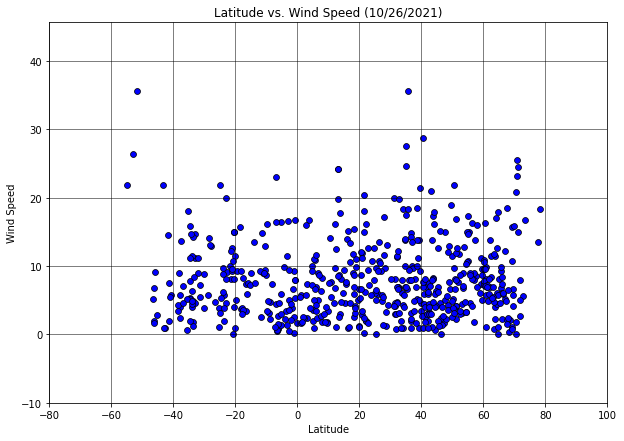

In [315]:
lat = clean_city_data.iloc[:,1]
wind_speed = clean_city_data.iloc[:,6]
plt.figure(figsize=(10,7))

# Plot the lat vs the wind speed
plt.scatter(x = lat, y = wind_speed,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
plt.xlim(-80,100)
plt.ylim(min(clean_city_data['Wind Speed']) - 10, max(clean_city_data['Wind Speed']) + 10)
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.title(f"Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show
plt.savefig(r"C:\Git\python-api-challenge\output_data\Lat_WindSpeed_Fig4.pdf")

*Looking at Latitude versus Wind Speed plot above we can see that Wind Speed is fairly evenly distributed, with some
*outliers -55 and +35 Latitude
*Northern Hemisphere has more data collections, and it appears more dense on the scatter plot

## Linear Regression

In [196]:
#Northern Hemisphere separation
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
len(northern_hemisphere)
northern_hemisphere.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,koslan,63.4564,48.8989,28.33,87.0,100.0,0.87,RU,1.635199e+09
2,katsuura,35.1333,140.3000,57.22,94.0,100.0,24.70,JP,1.635199e+09
6,tateyama,34.9833,139.8667,57.13,88.0,75.0,27.63,JP,1.635199e+09
7,naples,40.8333,14.2500,65.28,76.0,20.0,5.99,IT,1.635199e+09
9,albany,42.6001,-73.9662,55.94,90.0,100.0,3.27,US,1.635199e+09
11,baiyin,36.5583,104.2081,40.08,71.0,99.0,2.04,CN,1.635199e+09
12,nantong,32.0303,120.8747,57.99,78.0,49.0,4.70,CN,1.635199e+09
14,thompson,55.7435,-97.8558,41.16,65.0,75.0,4.61,CA,1.635199e+09
17,muravlenko,63.7898,74.5230,24.51,96.0,100.0,11.48,RU,1.635199e+09
18,upernavik,72.7868,-56.1549,15.21,61.0,11.0,5.64,GL,1.635199e+09


In [198]:
#Southern Hemisphere separation
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
len(southern_hemisphere)
southern_hemisphere.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,64.42,50.0,0.0,4.00,AR,1.635199e+09
3,itambacuri,-18.0311,-41.6850,70.84,95.0,97.0,3.76,BR,1.635199e+09
5,ushuaia,-54.8000,-68.3000,33.46,93.0,40.0,21.85,AR,1.635199e+09
8,mataura,-46.1927,168.8643,62.76,70.0,89.0,1.99,NZ,1.635199e+09
13,taltal,-25.4000,-70.4833,62.55,70.0,23.0,3.85,CL,1.635199e+09
15,hithadhoo,-0.6000,73.0833,83.03,71.0,87.0,16.71,MV,1.635199e+09
16,rio gallegos,-51.6226,-69.2181,50.05,29.0,20.0,35.68,AR,1.635199e+09
19,rikitea,-23.1203,-134.9692,75.22,72.0,86.0,20.02,PF,1.635199e+09
20,east london,-33.0153,27.9116,64.58,80.0,90.0,14.74,ZA,1.635199e+09
22,avarua,-21.2078,-159.7750,77.05,61.0,75.0,12.66,CK,1.635199e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.87


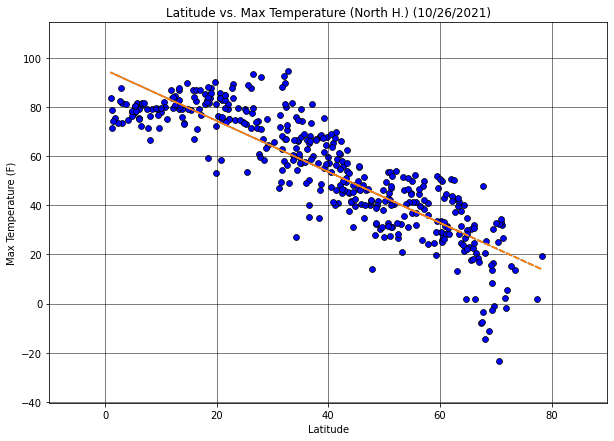

<Figure size 432x288 with 0 Axes>

In [316]:

# Perform a linear regression on Latitude North versus Maximum Temperature 
lat_n = northern_hemisphere.iloc[:,1]
max_temp_n = northern_hemisphere.iloc[:,3]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_n,max_temp_n)[0],2)}")
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_n, max_temp_n)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * lat_n + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_n, max_temp_n,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_n,vc_fit,"--")
plt.xlim(-10,90)
plt.ylim(min(northern_hemisphere['Max Temp']) - 17, max(northern_hemisphere['Max Temp']) + 20)
plt.title(f"Latitude vs. Max Temperature (North H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(lat_n,vc_fit,"--")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\NH_Lat_MaxTemp_Fig5.pdf")

*Looking at the graph and linear regression above for Northern Hemisphere we can see that temperature rises with 
*approach of equator
*Note, our data collection has more data samples further north making linear regression and r-value more significant

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.66


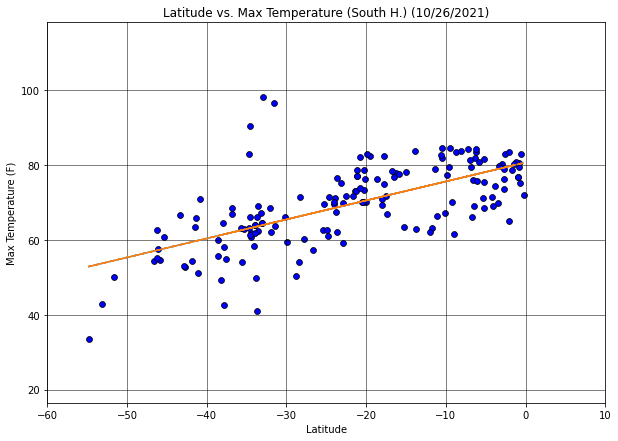

<Figure size 432x288 with 0 Axes>

In [317]:

# Perform a linear regression on Latitude South versus Maximum Temperature 
lat_s = southern_hemisphere.iloc[:,1]
max_temp_s = southern_hemisphere.iloc[:,3]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_s,max_temp_s)[0],2)}")
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_s, max_temp_s)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * lat_s + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_s, max_temp_s,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_s,vc_fit,"--")
plt.xlim(-60,10)
plt.ylim(min(southern_hemisphere['Max Temp']) - 17, max(southern_hemisphere['Max Temp']) + 20)
plt.title(f"Latitude vs. Max Temperature (South H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(lat_s,vc_fit,"--")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\SH_Lat_MaxTemp_Fig6.pdf")

*Looking at the graph and linear regression and r-value above we can see that temperature rises with approach of equator
*Temperature consequently drops as we approach South Pole
*Note: Lienar regression is smaller on negative Latitude due to smaller number of data points and lowesr dat point is at
*-55 Latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.21


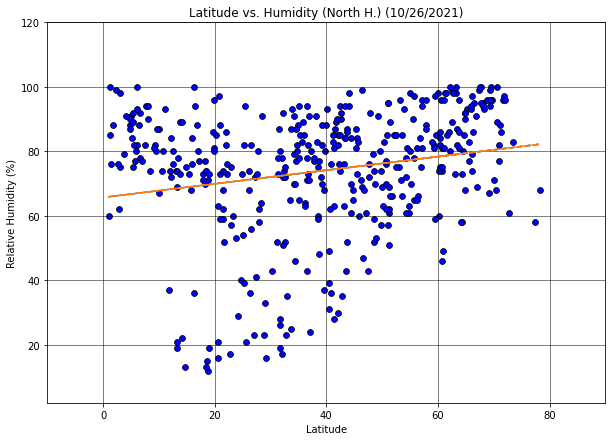

<Figure size 432x288 with 0 Axes>

In [318]:
# Perform a linear regression on Latitude North versus Humidity 
lat_n = northern_hemisphere.iloc[:,1]
humidity_n = northern_hemisphere.iloc[:,4]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_n,humidity_n)[0],2)}")
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_n, humidity_n)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * lat_n + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_n, humidity_n,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_n,vc_fit,"--")
plt.xlim(-10,90)
plt.ylim(min(northern_hemisphere['Humidity']) - 10, max(northern_hemisphere['Humidity']) + 20)
plt.title(f"Latitude vs. Humidity (North H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Relative Humidity (%)")
plt.plot(lat_n,vc_fit,"--")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\NH_Lat_Humidty_Fig7.pdf")

*Looking at the graph and linear regression above for Northern Hemisphere we can see that Humidity rises with 
*increase in Latitude
*Note, our data collection has more data samples further north making linear regression and r-value more significant

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2535


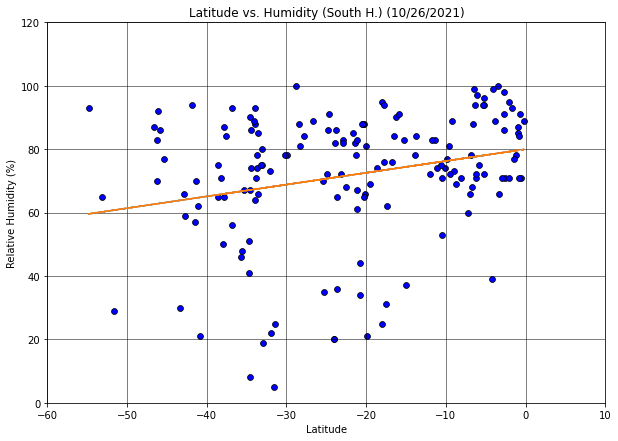

<Figure size 432x288 with 0 Axes>

In [319]:
# Perform a linear regression on Latitude South versus Humidity 
lat_s = southern_hemisphere.iloc[:,1]
humidity_s = southern_hemisphere.iloc[:,4]
lat_s_mean = round(lat_s.mean(), 6)
humidity_s_mean = round(humidity_s.mean(), 6)
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_s,humidity_s)[0],4)}")
#print(f"The r-value is {r = np.corrcoef(lat_s,humidity_s)}")
#print(f"The r-value is {scipy.stats.pearsonr(lat_s, humidity_s)[0]}")
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_s, humidity_s)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * lat_s + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_s, humidity_s,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_s,vc_fit,"--")
plt.xlim(-60,10)
plt.ylim(min(southern_hemisphere['Humidity'])-5, max(southern_hemisphere['Humidity']) + 20)
plt.title(f"Latitude vs. Humidity (South H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Relative Humidity (%)")
plt.plot(lat_s,vc_fit,"--")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\SH_Lat_Humidity_Fig8.pdf")

*Looking at the graph and linear regression above for Southern Hemisphere we can see that Humidity increases with approach
*of equator
*Note: Southern Heisphere has less data points, so that is something to take into consideration, because our dat isnot evenly
*distributed on both hemispheres

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.17


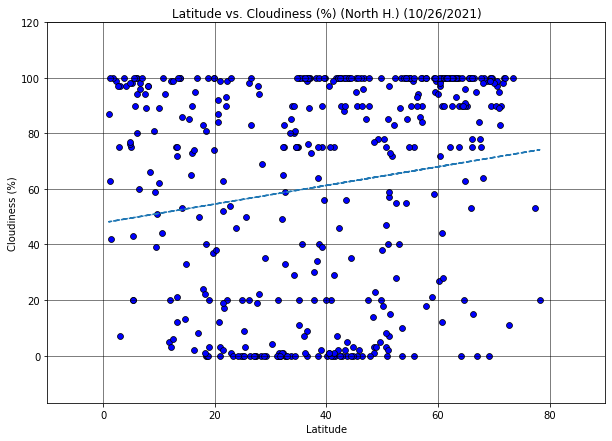

<Figure size 432x288 with 0 Axes>

In [320]:
# Perform a linear regression on Latitude North versus Cloudiness 
lat_n = northern_hemisphere.iloc[:,1]
cloudiness_n = northern_hemisphere.iloc[:,5]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_n,cloudiness_n)[0],2)}")
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_n, cloudiness_n)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * lat_n + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_n, cloudiness_n,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_n,vc_fit,"--")
plt.xlim(-10,90)
plt.ylim(min(northern_hemisphere['Cloudiness']) - 17, max(northern_hemisphere['Cloudiness']) + 20)
plt.title(f"Latitude vs. Cloudiness (%) (North H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\NH_Lat_Cloudiness_LR_Fig9.pdf")

*Looking at the graph and linear regression above for Northern Hemisphere we can see that Cloudiness rises with 
*increase in Latitude
*Note, our data collection has more data samples further north making linear regression and r-value more significant

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2119


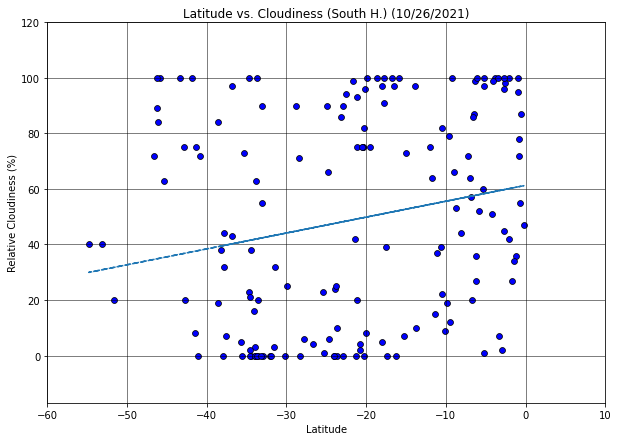

<Figure size 432x288 with 0 Axes>

In [321]:
# Perform a linear regression on Latitude South versus Clodiness 
lat_s = southern_hemisphere.iloc[:,1]
cloudiness_s = southern_hemisphere.iloc[:,5]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_s,cloudiness_s)[0],4)}")

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_s, cloudiness_s)
# Create equation of line to calculate predicted increase in cloudiness as altitude increases
vc_fit = vc_slope * lat_s + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_s, cloudiness_s,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_s,vc_fit,"--")
plt.xlim(-60,10)
plt.ylim(min(southern_hemisphere['Cloudiness']) - 17, max(southern_hemisphere['Cloudiness']) + 20)
plt.title(f"Latitude vs. Cloudiness (South H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Relative Cloudiness (%)")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\SH_Lat_Cloudiness_LR_Fig10.pdf")

*Looking at the graph and linear regression above for Southern Hemisphere we can see that Cloudiness rises with 
*approach of equator


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.067


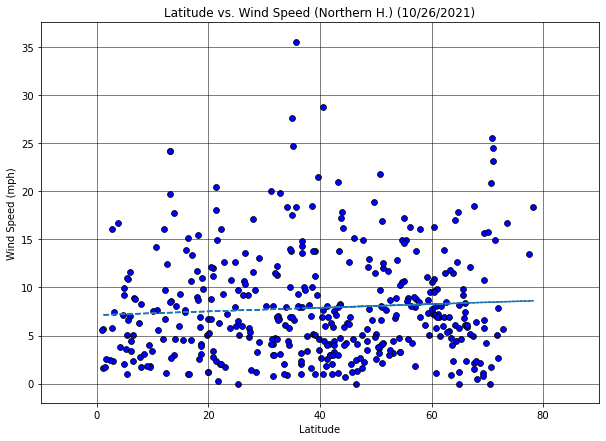

<Figure size 432x288 with 0 Axes>

In [322]:
# Perform a linear regression on Latitude South versus Wind Speed 
lat_n = northern_hemisphere.iloc[:,1]
wind_speed_n= northern_hemisphere.iloc[:,6]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_n,wind_speed_n)[0],4)}")

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_n, wind_speed_n)
# Create equation of line to calculate predicted increase in wind speed as altitude increases
vc_fit = vc_slope * lat_n + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_n, wind_speed_n,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_n,vc_fit,"--")
plt.xlim(-10,90)
plt.ylim(min(northern_hemisphere['Wind Speed']) -2, max(northern_hemisphere['Wind Speed']) + 2)
plt.title(f"Latitude vs. Wind Speed (Northern H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig(r"C:\Git\python-api-challenge\output_data\NH_Lat_WindSpeed_LR_Fig11.pdf")

*Looking at the graph and linear regression above for Northern Hemisphere we can see that Wind Speed does't significantly
*change with altitude, except for some outliers around Latitude +35
*Note: Linear regression related to Wind Speed and Latitude in Northern Hemisphere isn't significant

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1927


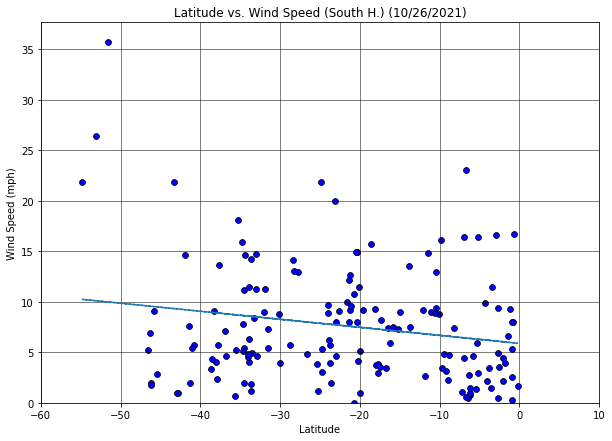

<Figure size 432x288 with 0 Axes>

In [323]:
# Perform a linear regression on Latitude South versus Wind Speed 
lat_s = southern_hemisphere.iloc[:,1]
wind_speed_s = southern_hemisphere.iloc[:,6]
#Calculate Correlation Coefficient
print(f"The r-value is {round(st.pearsonr(lat_s,wind_speed_s)[0],4)}")

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = linregress(lat_s, wind_speed_s)
# Create equation of line to calculate predicted increase in wind speed as altitude increases
vc_fit = vc_slope * lat_s + vc_int
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(10,7))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.scatter(lat_s, wind_speed_s,
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.plot(lat_s,vc_fit,"--")
plt.xlim(-60,10)
plt.ylim(min(southern_hemisphere['Wind Speed']), max(southern_hemisphere['Wind Speed']) + 2)
plt.title(f"Latitude vs. Wind Speed (South H.) ({date.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
#Save Scatter Plot
plt.savefig(r"C:\Git\python-api-challenge\output_data\SH_Lat_WindSpeed_LR_Fig12.pdf")


*Looking at the graph and linear regression above for Southern Hemisphere we can see that Wind Speed is increasing as we go further South, but outliers make it more substantial
*Note: There are some outliers around -55 Latitude making Linear regression more steep as we go further on the negative
*Latitude